# Data understanding, motivation, results, and conclusions



## Data understanding


The dataset is a direct copy of the Bank Transaction Dataset for Fraud Detection from Kaggle. The dataset was last updated on 04/11/2024.


This dataset provides a detailed look into transactional behavior and financial activity patterns, ideal for exploring fraud detection and anomaly identification. It contains 2,512 samples of transaction data, covering various transaction attributes, customer demographics, and usage patterns. Each entry offers comprehensive insights into transaction behavior, enabling analysis for financial security and fraud detection applications.

The dataset was synthesized based on realistic bank transaction patterns from publicly available sources, including research studies, industry reports, fraud detection surveys and other relevant studies.


The dataset is made up of individual transactions made from 2023-01-03 to 2024-01-02,


Link: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection




## Motivation

This is a practice of EDA and machine learning application on banking data.

At the end of the project, the goals include:
1. Performed well-coded EDA with valueable insights.
2. Developed a clustering model that properly segment transactions and accounts.
3. Codes are well-documented and pythonic.

## Result
(To be filled after finishing)

## Conclusions
(To be filled after finishing)

## Limitations
(To be filled after finishing)

# Importing libraries and data

In [ ]:
# Import libraries

# General data analytics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime handlers
import datetime as dt
import calendar

# Machine learning
# Pre-processing + transformers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Model training
from sklearn.cluster import KMeans


#import libraries for model evaluation
from sklearn import metrics #Import scikit-learn metrics module for model evaluation


# Model optimization
from sklearn.ensemble import GradientBoostingRegressor


#Ad hoc

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Comment: Even though it is possible to pull data directly from Kaggle, I chose to download it to my drive. This is to avoid potential updates or changes to the online file, making the analysis no longer valid.

In [ ]:
# Loading data
df = pd.read_csv('/content/drive/MyDrive/Github/3 Bank transaction analysis and fraud detection/bank_transactions_data_2.csv')
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [ ]:
# Inspecting data
print(df.shape)
print(df.dtypes)

(2512, 16)
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [ ]:
# Checking data
df1 = df[df['AccountID']=='AC00460']
df1.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
67,TX000068,AC00460,521.06,2023-04-18 18:40:47,Debit,Albuquerque,D000305,131.41.45.13,M063,Branch,25,Student,128,1,1951.42,2024-11-04 08:12:10
569,TX000570,AC00460,170.53,2023-02-06 18:59:44,Debit,Oklahoma City,D000140,158.135.64.240,M089,Branch,24,Student,58,1,801.01,2024-11-04 08:09:49
755,TX000756,AC00460,1607.55,2023-09-07 16:27:03,Debit,Phoenix,D000070,94.37.250.128,M031,ATM,31,Engineer,156,1,6227.99,2024-11-04 08:07:33
1161,TX001162,AC00460,484.30,2023-10-17 17:46:52,Credit,Boston,D000407,93.160.83.196,M026,Online,61,Retired,230,3,7910.30,2024-11-04 08:11:08
1252,TX001253,AC00460,379.54,2023-01-03 17:14:14,Credit,Indianapolis,D000668,109.105.179.186,M040,Branch,41,Doctor,118,1,12571.76,2024-11-04 08:06:23
1451,TX001452,AC00460,26.50,2023-02-08 16:42:59,Debit,Indianapolis,D000175,9.230.41.239,M063,Online,48,Engineer,179,1,4854.83,2024-11-04 08:07:24
1459,TX001460,AC00460,659.71,2023-05-05 16:10:24,Credit,San Jose,D000095,150.83.4.238,M052,Branch,21,Student,148,1,106.86,2024-11-04 08:09:32
1879,TX001880,AC00460,0.84,2024-01-01 16:45:56,Debit,Austin,D000527,136.172.149.77,M036,ATM,52,Engineer,31,1,2207.54,2024-11-04 08:07:14
1995,TX001996,AC00460,999.28,2023-05-22 17:45:50,Debit,Boston,D000032,125.89.163.224,M050,Online,29,Engineer,40,1,4272.41,2024-11-04 08:12:15
2168,TX002169,AC00460,431.08,2023-07-17 18:24:15,Debit,Albuquerque,D000339,145.179.219.57,M013,Branch,59,Retired,25,1,6760.22,2024-11-04 08:06:52


In [ ]:
df2 = df['AccountID'].value_counts()
df2

,count
AccountID,
AC00460,12
AC00202,12
AC00362,12
AC00363,12
AC00480,11
...,...
AC00008,1
AC00472,1
AC00476,1


# Data cleaning

## 1. Missing data

In [ ]:
# Checking for missing data
for colu in df.columns:
  print('{} is missing: '.format(colu),df[colu].isna().sum(),' entries')

TransactionID is missing:  0  entries
AccountID is missing:  0  entries
TransactionAmount is missing:  0  entries
TransactionDate is missing:  0  entries
TransactionType is missing:  0  entries
Location is missing:  0  entries
DeviceID is missing:  0  entries
IP Address is missing:  0  entries
MerchantID is missing:  0  entries
Channel is missing:  0  entries
CustomerAge is missing:  0  entries
CustomerOccupation is missing:  0  entries
TransactionDuration is missing:  0  entries
LoginAttempts is missing:  0  entries
AccountBalance is missing:  0  entries
PreviousTransactionDate is missing:  0  entries


## 2. Outliers

In [ ]:
# Checking stats on the data
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## 3. Data type

In [ ]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


Comment: While most variables seem to have been imported in the right data type, date data are being registered as 'object' (nominal) type. I will convert them to date type to reflect their meaning and prepare for later EDA.

In [ ]:
# Correcting datetime data
targets = ['TransactionDate','PreviousTransactionDate']

for target in targets:
  df[target] = pd.to_datetime(df[target],format='%Y-%m-%d %H:%M:%S')

df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,datetime64[ns]
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


Comment: Due to lack of information, it is assumed that all datetime data have already been converted to the same timezone and there is no daylight saving adjustment necessary.

In [ ]:
# Inspecting some nominal data suspected to be categorical
targets = ['TransactionType','Location','Channel','CustomerOccupation']

for target in targets:
  print(target)
  print(df[target].unique())
  print('')

TransactionType
['Debit' 'Credit']

Location
['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']

Channel
['ATM' 'Online' 'Branch']

CustomerOccupation
['Doctor' 'Student' 'Retired' 'Engineer']



Comment: For variables with only a few unique values, I will convert them to category data to lessen memory usage.

In [ ]:
# Converting to categorical, preserving intended order while reducing memmory usage
print('memory usage BEFORE conversion (in bytes)')
print(df.memory_usage().sum())

targets = ['TransactionType','Channel','CustomerOccupation']

for target in targets:
  df[target] = df[target].astype('category')


print('memmory usage AFTER conversion (in bytes)')
print(df.memory_usage().sum())

print(df.dtypes)

memory usage BEFORE conversion (in bytes)
321668
memmory usage AFTER conversion (in bytes)
269376
TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                  category
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                          category
CustomerAge                         int64
CustomerOccupation               category
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


# Exploratory Data Analysis (EDA)

## 1. Univariate analysis

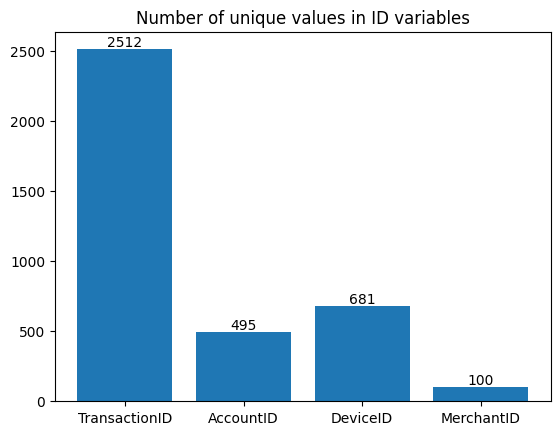

In [ ]:
# Visualizing ID data counts
id_vars = ['TransactionID','AccountID','DeviceID','MerchantID']

uniques = []

for var in id_vars:
  unique = len(df[var].unique())
  uniques.append(unique)

plot = plt.bar(id_vars, uniques)
plt.title('Number of unique values in ID variables')
plt.bar_label(plot)

plt.show()

In [ ]:
# Distilling transaction date variable into a new dateframe
trans_dates = df['TransactionDate'].reset_index()
trans_dates['date'] = trans_dates['TransactionDate'].dt.date
trans_dates['time'] = trans_dates['TransactionDate'].dt.time
trans_dates['weekday']  = trans_dates['TransactionDate'].dt.strftime('%a')
trans_dates['weekday'] = trans_dates['weekday'].astype('category')
trans_dates['weekday'] = trans_dates['weekday'].cat.reorder_categories(new_categories=['Mon','Tue','Wed','Thu','Fri'],ordered=False)

trans_dates.head(10)

,index,TransactionDate,date,time,weekday
0,0,2023-04-11 16:29:14,2023-04-11,16:29:14,Tue
1,1,2023-06-27 16:44:19,2023-06-27,16:44:19,Tue
2,2,2023-07-10 18:16:08,2023-07-10,18:16:08,Mon
3,3,2023-05-05 16:32:11,2023-05-05,16:32:11,Fri
4,4,2023-10-16 17:51:24,2023-10-16,17:51:24,Mon
5,5,2023-04-03 17:15:01,2023-04-03,17:15:01,Mon
6,6,2023-02-15 16:36:48,2023-02-15,16:36:48,Wed
7,7,2023-05-08 17:47:59,2023-05-08,17:47:59,Mon
8,8,2023-03-21 16:59:46,2023-03-21,16:59:46,Tue
9,9,2023-03-31 16:06:57,2023-03-31,16:06:57,Fri


In [ ]:
# Check for simultaneous transactions --> found none
trans_dates[trans_dates.duplicated(subset=['TransactionDate']) == True]

,index,TransactionDate,date,time,weekday


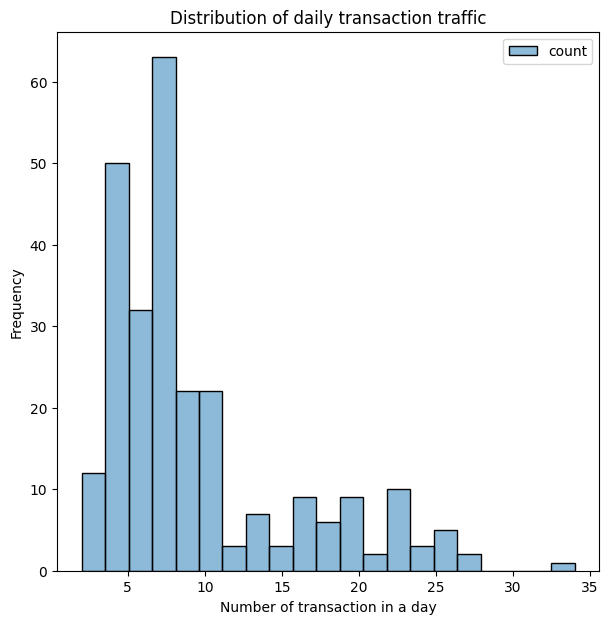

In [ ]:
# Visualizing frequencies
## by date
date = trans_dates['date'].value_counts().reset_index()

plt.figure(figsize=(7, 7))
sns.histplot(data=date)
plt.xlabel('Number of transaction in a day')
plt.ylabel('Frequency')
plt.title('Distribution of daily transaction traffic')

plt.show()

For most days, the number of transaction is less than 10. A higher traffic count in a day could indicate some fradulent activities.

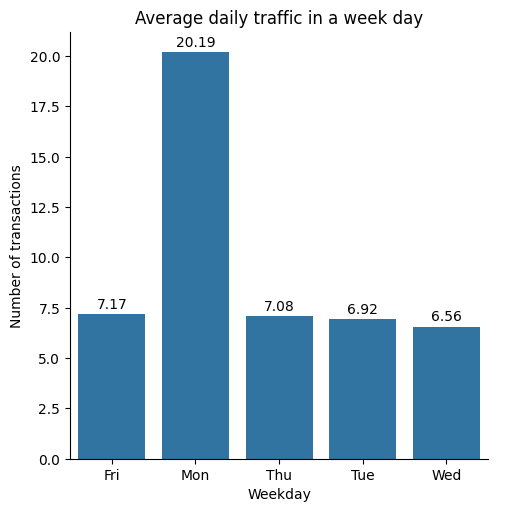

In [ ]:
# by weekday
date['date'] = pd.to_datetime(date['date'],format='%Y%m%d')
date['weekday'] = date['date'].dt.strftime('%a')

weekdays_avg = date.groupby('weekday').agg({'count':'mean'}).reset_index()

plot = sns.catplot(data=weekdays_avg,x='weekday',y='count',kind='bar')

### Adding data labels with plot.ax
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # x coordinate of text
        h + 0.5, # y coordinate of text
        '{}'.format(round(h,2)),
        ha='center',
        va='center',
        size=10)

plt.title('Average daily traffic in a week day')
plt.xlabel('Weekday')
plt.ylabel('Number of transactions')

plt.show()


Except for Monday, most days average at around 7 transactions a day. Monday stood out at around 20 transactions per day. The pattern should be incorporated in anomaly detection later to reduce false positives.

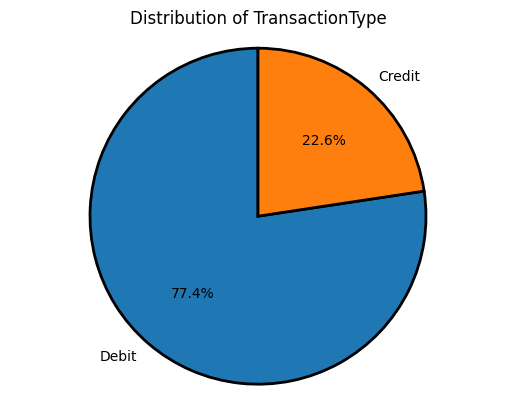

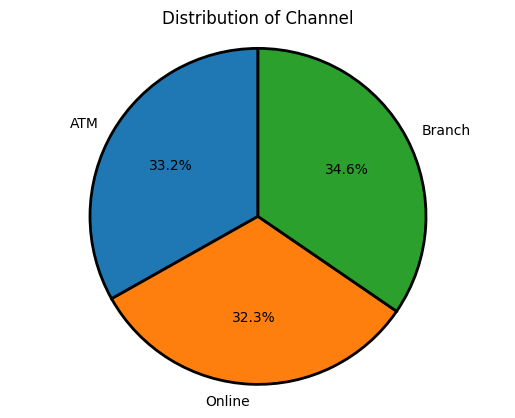

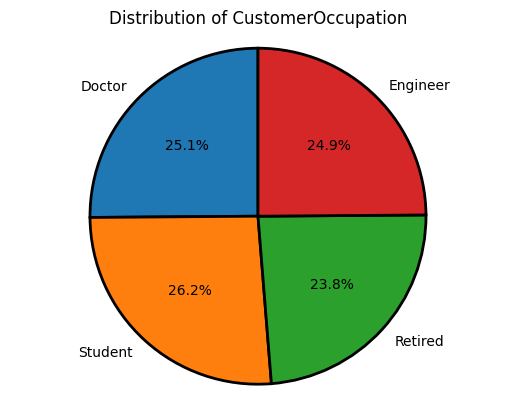

In [ ]:
# Visualzing categorical data proportions with pie chart
values = []

for col in df.select_dtypes(include=['category']).columns:
  # Get unique labels
  labels = df[col].unique()
  # Count occurrences for each label
  for label in labels:
    count = df[df[col] == label][col].count()
    values.append(int(count))
  # Create pie chart
  plt.pie(values, labels=labels,
                      autopct='%1.1f%%',
                      startangle=90,
                      wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
  plt.title('Distribution of {}'.format(col))
  plt.axis('equal')  # Equal aspect ratio makes it a circle
  plt.show()
  values = []

Comment: Only for TransactionType, there is an imbalance proportion between the two types: 'Credit' and "Debit". A small sample size of Credit transactions might not cover an adequate number of patterns of fraud in real life.

In [ ]:
# Looking at numerical variables
df.describe(include=['int64','float64'])

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


<Figure size 700x700 with 0 Axes>

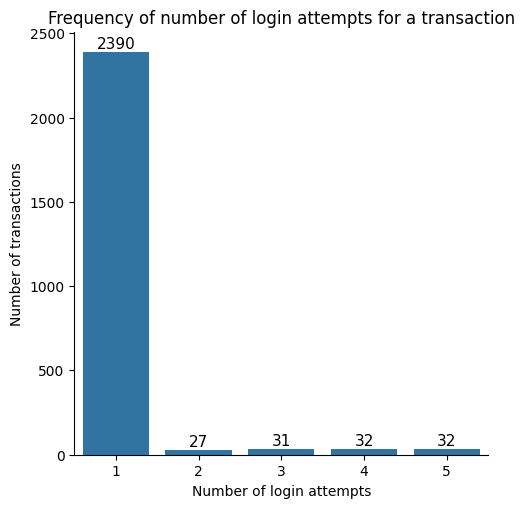

In [ ]:
## Seeing LogicAttempts' values frequency
logins = df['LoginAttempts'].value_counts().reset_index()

plt.figure(figsize=(7, 7))
plot = sns.catplot(x='LoginAttempts', y='count', kind='bar', data=logins)

### Adding data labels with plot.ax
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # x coordinate of text
        h + 50, # y coordinate of text
        '{}'.format(int(h)),
        ha='center',
        va='center',
        size=11)

plt.xlabel('Number of login attempts')
plt.ylabel('Number of transactions')
plt.title('Frequency of number of login attempts for a transaction')
plt.show()

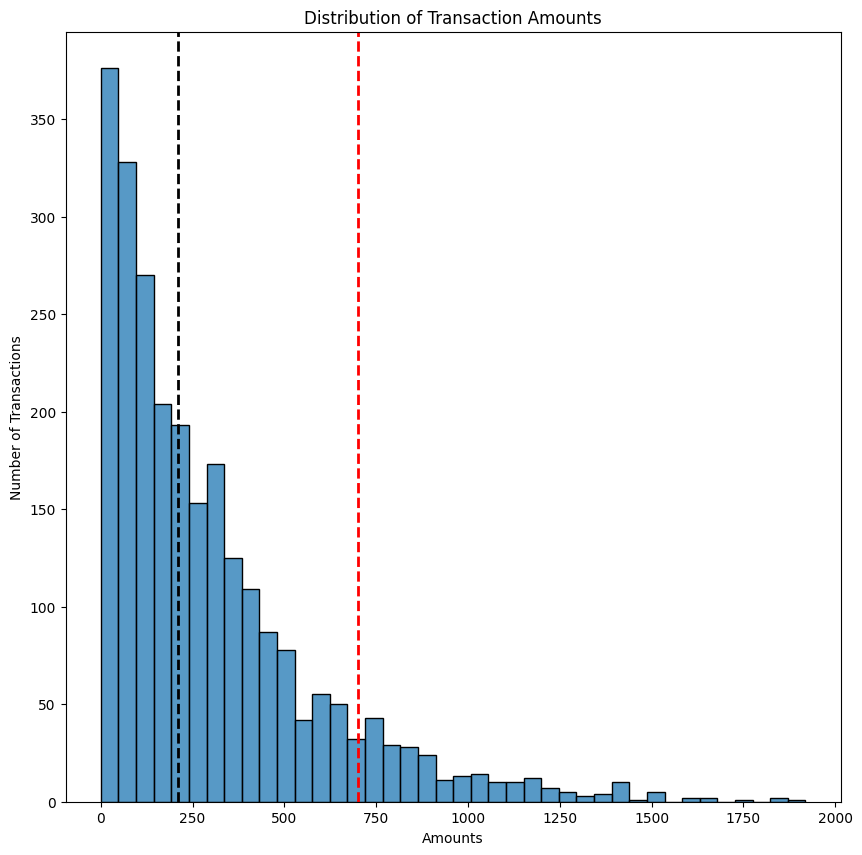

In [ ]:
# Transaction Amount
median = np.quantile(df['TransactionAmount'],0.5)
quantile_90 = np.quantile(df['TransactionAmount'],0.9)

plt.figure(figsize=(10, 10))
sns.histplot(df['TransactionAmount'])
plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(quantile_80, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amounts')
plt.ylabel('Number of Transactions')
plt.show()

This variable in particular is seeing outliers. While the lower 50% of transactions (black line) recorded an amount less than 250, the other half range from that minimum to almost 2000 dollars. Even at the 90th percentile (red line), the threshold is still less than 750. If models that use 'distance' are to be applied, some transformation might be needed to make sure there is no bias favouring this variable.

## Bivariate Analysis
Analysis will now extend to look at 2 variables at a time to see connection between them.

            count
count  495.000000
mean     5.074747
std      2.294261
min      1.000000
25%      3.000000
50%      5.000000
75%      7.000000
max     12.000000


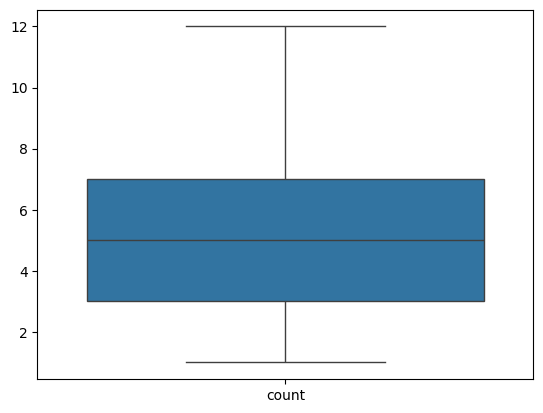

In [ ]:
# Activities by account
## Transaction contribution by account
account_activities = df['AccountID'].value_counts().reset_index()
print(account_activities.describe())

sns.boxplot(data=account_activities)
plt.show()

# Machine Learning - Unsupervised (TBC)

In [ ]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [ ]:
# Eliminating unnecessary features
targets_to_drop = ['TransactionID','']

In [ ]:
# Initializing a model with 3 clusters
model = KMeans(n_clusters =3)
model.fit(array)

NameError: name 'array' is not defined